<a href="https://colab.research.google.com/github/MiMghtt/-Tutorial_extrair_dados_Bucket_enviar_MongoDB/blob/main/Tutorial_enviar_pasta_bucket_para_mongoDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalar biblioteca MongoDB para manipulacao em Python

In [ ]:
# Instalando biblioteca PyMongo
pip install pymongo

#Importar os Módulos necessários para integrar ao MongoDB

In [ ]:
# Importando módulos
import pymongo
from pymongo import MongoClient

#Configure a chave do mongoDB




(Ignorar caso já possuir uma chave sem estar fora da validade de expiração)

No MongoDB, navegar pelo Menu esquerdo lateral até a opção Security > Database Access

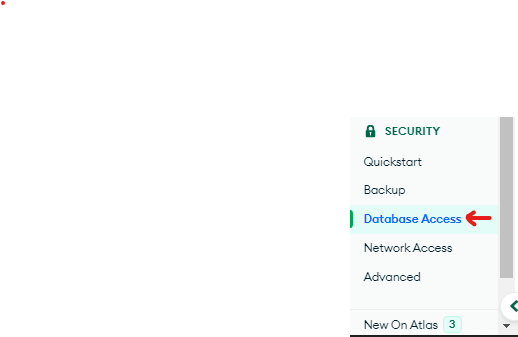

Clicar em "ADD NEW DATABASE USER"

Ir na opção "Certificate"

Digitar um nome no campo "Common Name"

Selecionar a opção "Download certificate when user is added"

Selecionar o tempo até a chave expirar no campo "Choose certificate expiration"

E escolher um tipo de permissão para a chave no campo "Built-in Role"

Clicar em "Add User"

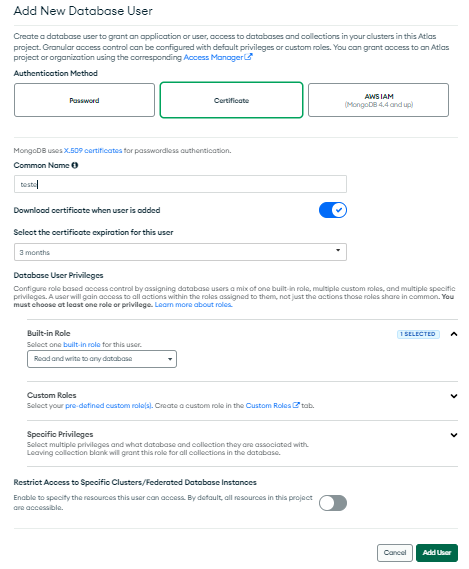


#Configuração para integrar o Colab ao MongoDB

In [ ]:
# Configurando integração do MongoDB com o Colab
uri = "mongodb+srv://clusteraula0.on8lj7t.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-7634650203083248311.pem',
                     )




#Integrar Google Cloud Storage para coletar arquivos do Bucket

In [ ]:
#instalação do cloud storage
pip install gcsfs


#Importar módulos necessários para a integração do GCP com o Colab

In [ ]:
import os
from google.cloud import storage
import numpy as np
import pandas as pd

#Configurando chave de segurança

(Caso não possua chave do GCP dentro do prazo de validade)

Navegar no Menu lateral esquerdo até IAM > Contas de Servicos

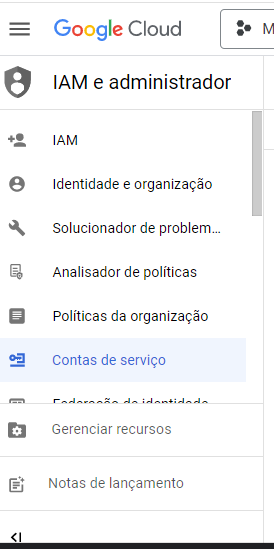

Clicar em CHAVES > ADICIONAR CHAVE

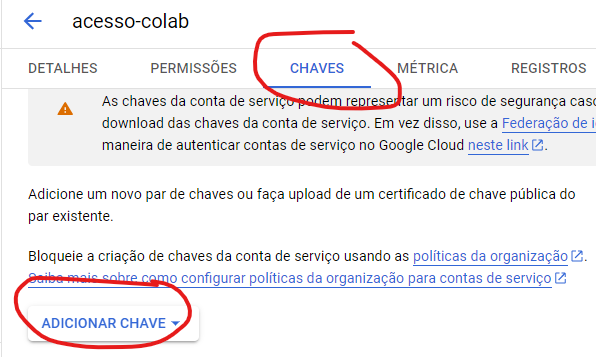

Escolher opção JSON e clicar em CRIAR


In [ ]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto)

serviceAccount = '/content/skilled-tuner-377718-395f300c8996.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('michelmarighetti')
bucket.blob('marketing_campaign.csv')
path = 'gs://michelmarighetti/brutos/marketing_campaign.csv'

#Caso queira extrair um unico arquivo do bucket:

In [ ]:
#Leitura DF
df = pd.read_csv(path,sep=',',encoding='ISO-8859-1')


#Caso queira enviar um unico arquivo ao MongoDB:

In [ ]:
#Criação do conjunto de dados (db) e coleção de dados (collection)
db = client ['nome_database']
collection = db['nome_colecao']


In [ ]:
df_dict= df.to_dict("records")
collection.insert_many(df_dict)

#Caso queira extrair todos os arquivos de uma pasta no Bucket



In [ ]:
storage_client = storage.Client()
bucket_name = storage_client.get_bucket('nome_do_bucket')
blobs = storage_client.list_blobs(bucket_name)

lista_brutos = [] 
lista_brutos_copia= []
nome_dataframes= []

for blob in blobs:
  if(blob.name[0] =='b' and blob.name[-1] =='x' and blob.name != 'brutos/arquivo_exemplo1.xlsx' and blob.name != 'brutos/arquivo_exemplo2.xlsx'):
    lista_brutos.append(blob.name)
    lista_brutos_copia.append(blob.name)   
    nome_dataframes.append(blob.name)

In [ ]:
for i in range(qtdTabela):
  path = f'gs://nome_bucket/{lista_brutos[i]}'  
  lista_brutos[i]= pd.read_excel(path)

#Enviar todos os arquivos de uma vez ao MongoDB

In [ ]:
for i in range(qtdTabela):

  db = client2['Brutos_ProjetoFinal']
  colecao = db[f'{nomeDosDf[i]}.xls']
   
  df_dict = brutus[i].to_dict("records")

  colecao.insert_many(df_dict)